In [1]:
import lireDonnees
from classifieurs.modele_probabiliste import *
from tests import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
train = pd.read_csv('data/train.csv')
train = train.drop("id",axis=1)

test = pd.read_csv('data/test.csv')

le = LabelEncoder()
le.fit(train.species)

y = train.pop("species")
y = le.transform(y)

X = train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.2848035868435802}

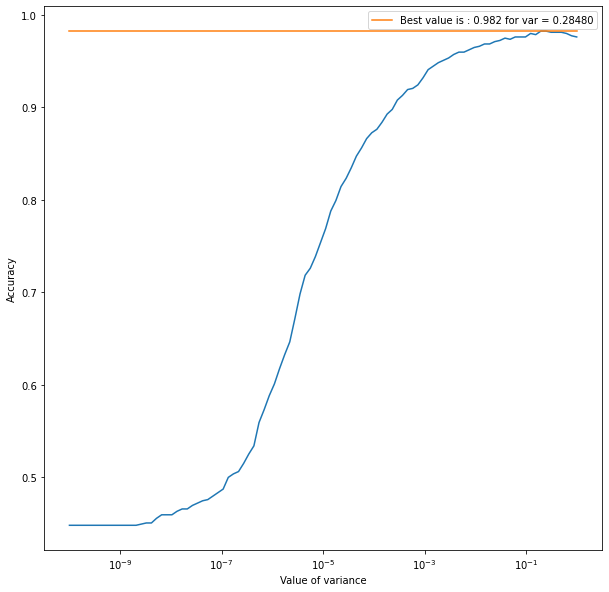

In [4]:
cvres = gs_NB.cv_results_
cvres
len(cvres["params"])
list_param = []

for i in range(0,len(cvres["params"])):
    list_param.append(list(cvres["params"][i].values())[0])

ymax = np.ones(len(cvres["mean_test_score"]))*max(cvres["mean_test_score"])
#print(ymax)

C = np.logspace(0, -10, 100)
plt.figure(figsize=(10,10))
plt.plot(C, cvres["mean_test_score"])
plt.plot(C, ymax, label='Best value is : ' + '{:1.3f}'.format(max(cvres["mean_test_score"])) + ' for var = ' + '{:1.5f}'.format(list(gs_NB.best_params_.values())[0]))
plt.legend()
plt.xscale('log')
plt.xlabel('Value of variance')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# create an instance of the GaussianNBClassifier class with a dictionary of hyperparameters to search over
gaussian_classifier = GaussianNBClassifier({'var_smoothing': np.logspace(0, -9, num=100)})

# find the best hyperparameters for the classifier
gaussian_best_params = gaussian_classifier.hyperparameter_search(X_train, y_train, k=5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [6]:
gaussian_best_params

{'var_smoothing': 0.2848035868435802}

In [12]:
gaussian_classifier = GaussianNBClassifier()
gaussian_classifier.setParameter(gaussian_best_params)

In [13]:
gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
gaussian_classifier.error(y_pred,y_test)

{'precision': 0.9747474747474747,
 'accuracy': 0.9747474747474747,
 'recall': 0.9747474747474747,
 'f1': 0.9747474747474747}